In [9]:
import os
import pandas as pd
import seaborn as sns
# import env
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.api import Holt, ExponentialSmoothing


from sklearn.metrics import mean_squared_error
from math import sqrt 
from scipy import stats

# # for presentation purposes
# import warnings
# warnings.filterwarnings("ignore")
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 

### Wrangle the airline data by airline

In [10]:
flights = wrangle.pull_airline_data('UA')

In [11]:
flights.isna().sum()/len(flights)

FL_DATE                0.0
OP_CARRIER             0.0
OP_CARRIER_FL_NUM      0.0
ORIGIN                 0.0
DEST                   0.0
CARRIER_DELAY          0.0
WEATHER_DELAY          0.0
NAS_DELAY              0.0
SECURITY_DELAY         0.0
LATE_AIRCRAFT_DELAY    0.0
row_sums               0.0
dtype: float64

### Resample by daily mean as well as handle nulls

In [12]:
flights_daily_mean = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/alfredpirovits/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Alfred/wrangle.py:103: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_monthly_mean = flights.resample('M').mean().total_delays
/Users/alfredpirovits/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Alfred/wrangle.py:109: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
/Users/alfredpirovits/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Alfred/wrangle.py:124: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future

In [13]:
flights_daily_mean

,average_delay
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872
...,...
2019-12-27,50.564417
2019-12-28,69.395349
2019-12-29,77.831126


### Split the data based on chosen duration

In [14]:
def train_test_split(df=flights_daily_mean, time_duration='2W'):
    flights_fortnightly_mean = df.resample(time_duration).mean()
    
    # split into train, validation, test
    train = flights_fortnightly_mean[:'2016']
    validate = flights_fortnightly_mean['2017' : '2018']
    test = flights_fortnightly_mean['2019' : ]

    return train, validate, test

train, validate, test = train_test_split(df=flights_daily_mean, time_duration='2W')

In [15]:
train

,average_delay
FL_DATE,
2009-01-04,54.043771
2009-01-18,55.855312
2009-02-01,52.200066
2009-02-15,55.827596
2009-03-01,53.516151
...,...
2016-10-30,62.733906
2016-11-13,56.375604
2016-11-27,61.617909


In [16]:
validate

,average_delay
FL_DATE,
2017-01-08,58.462589
2017-01-22,60.676050
2017-02-05,60.655737
2017-02-19,64.074859
2017-03-05,62.031383
2017-03-19,62.373226
2017-04-02,59.677750
2017-04-16,66.607334
2017-04-30,60.729870


In [17]:
test

,average_delay
FL_DATE,
2019-01-06,63.645686
2019-01-20,64.707730
2019-02-03,70.354181
2019-02-17,69.715613
2019-03-03,62.466685
2019-03-17,63.501135
2019-03-31,63.101353
2019-04-14,68.249990
2019-04-28,70.604798


### Graph the average delay

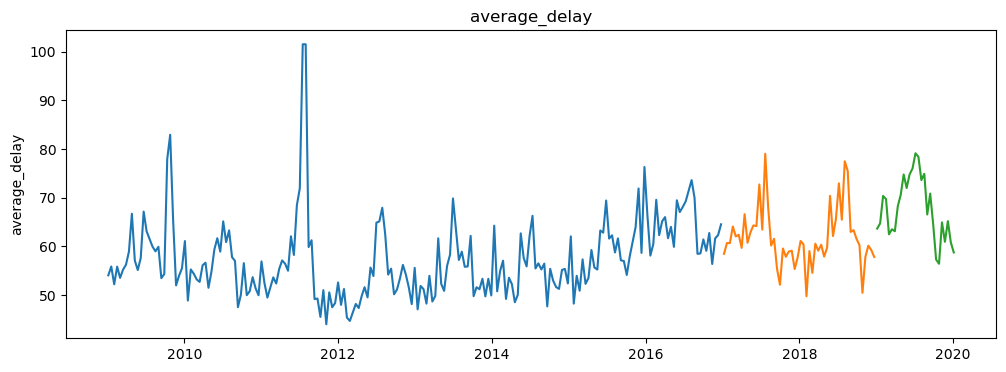

In [18]:
def graph_split(train, validate, test):

        plt.figure(figsize=(12,4))
        plt.plot(train['average_delay'])
        plt.plot(validate['average_delay'])
        plt.plot(test['average_delay'])
        plt.ylabel('average_delay')
        plt.title('average_delay')
        plt.show()

graph_split(train, validate, test)

### Define functions that are used later.  Borrowed from the syllabus.

In [19]:
# evaluation function to compute rmse
# Taken from the syllabus
def evaluate(target_var):
    #Computes rmse to two decimal places
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 2)
    return rmse


In [20]:
# plot and evaluate 

def plot_and_eval(target_var):
    
    # Plots train and validate as well as the predictions based on train. 
    
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [21]:
# Create the empty dataframe

eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df


,model_type,target_var,rmse


In [22]:
# function to store rmse for comparison purposes

def append_eval_df(model_type, target_var):
     # Appends the dataframe with rmse of the tests
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return pd.concat([eval_df, d])

In [23]:
# take the last average from the train set
last_average = train['average_delay'][-1:][0]


yhat_df = pd.DataFrame(
    {'average_delay': [last_average]},
    index=validate.index)

yhat_df.head()

,average_delay
FL_DATE,
2017-01-08,64.523443
2017-01-22,64.523443
2017-02-05,64.523443
2017-02-19,64.523443
2017-03-05,64.523443


average_delay -- RMSE: 7


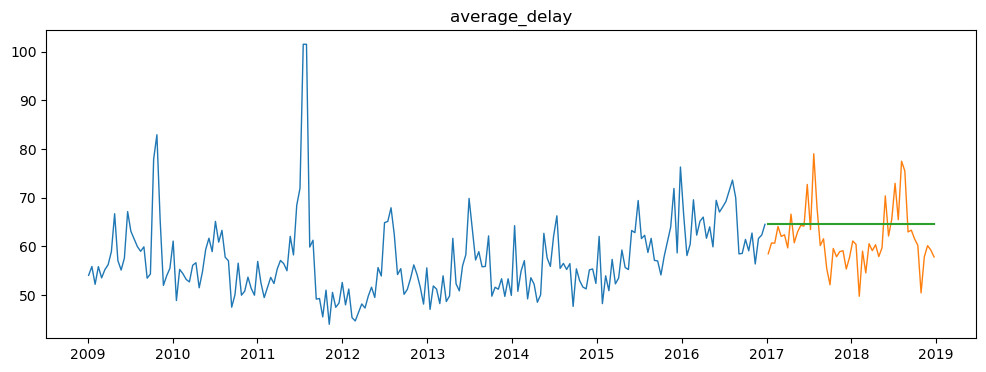

In [24]:
plot_and_eval('average_delay')

In [25]:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'average_delay')
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,6.52


In [26]:
# get the average of fortnightly delays from the train set
average_of_fortnightly_means = round(train['average_delay'].mean(), 2)


yhat_df = pd.DataFrame({'average_delay': [average_of_fortnightly_means]},
                        index=validate.index)

yhat_df.head()

,average_delay
FL_DATE,
2017-01-08,57.33
2017-01-22,57.33
2017-02-05,57.33
2017-02-19,57.33
2017-03-05,57.33


average_delay -- RMSE: 7


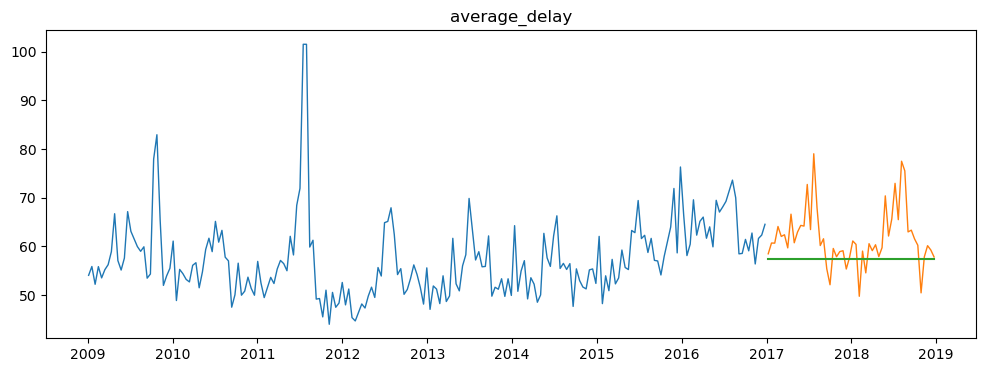

In [27]:
plot_and_eval('average_delay')

In [28]:
eval_df = append_eval_df(model_type = 'average_of_all_test_means', 
                             target_var = 'average_delay')
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,6.52
0,average_of_all_test_means,average_delay,7.41


In [29]:
#make a semi-annual rolling average

period = 13 #for 13 fortnights or a half year to get yearly average

rolling_average_delay = round(train['average_delay'].rolling(period).mean()[-1], 2)


# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'average_delay': [rolling_average_delay]},
                         index=validate.index)
yhat_df.head()

,average_delay
FL_DATE,
2017-01-08,63.79
2017-01-22,63.79
2017-02-05,63.79
2017-02-19,63.79
2017-03-05,63.79


average_delay -- RMSE: 6


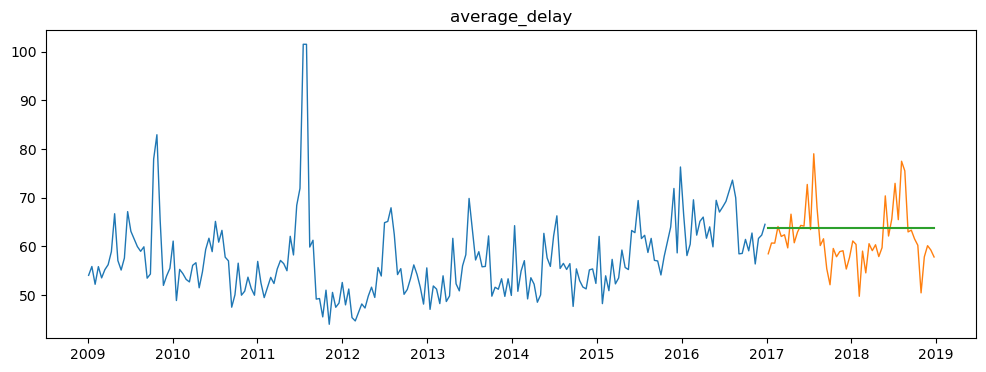

In [30]:
plot_and_eval('average_delay')

In [31]:
#Rolling averages for 1 fortnight, 4 weeks, 12 weeks, 26 weeks and 1 year

periods = [1, 2, 6, 13, 26]

for p in periods: 
    rolling_average_delay = round(train['average_delay'].rolling(p).mean()[-1], 2)
   
    yhat_df = pd.DataFrame({'average_delay': [rolling_average_delay]},
                            index=validate.index)
    
    model_type = str(p) + '_fortnight_moving_avg'
    
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)
        
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,6.52
0,average_of_all_test_means,average_delay,7.41
0,1_fortnight_moving_avg,average_delay,6.52
0,2_fortnight_moving_avg,average_delay,6.14
0,6_fortnight_moving_avg,average_delay,5.96
0,13_fortnight_moving_avg,average_delay,6.25
0,26_fortnight_moving_avg,average_delay,6.37


### Residuals make sense as delays are weather driven and weater is never consistent

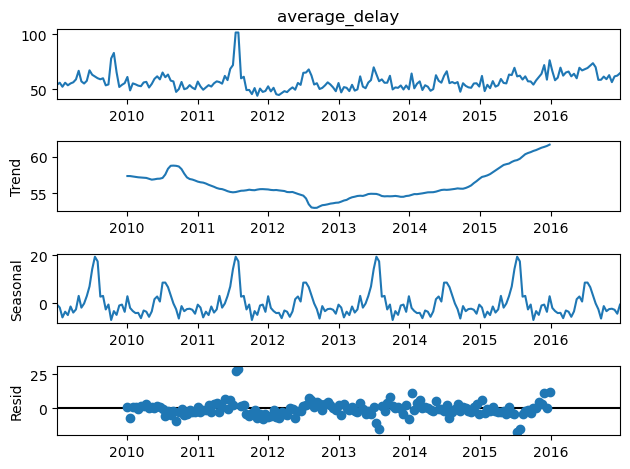

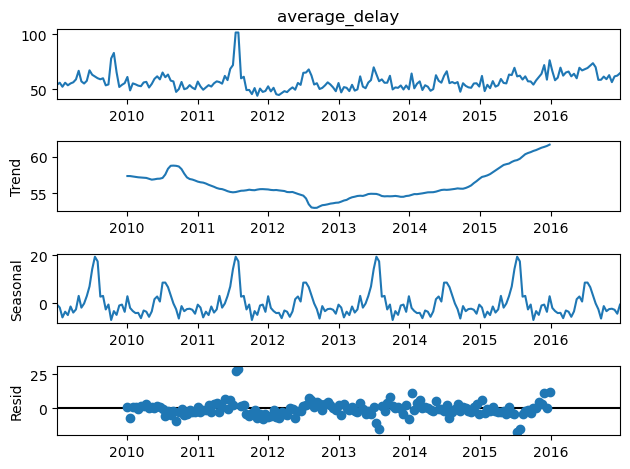

In [32]:
sm.tsa.seasonal_decompose(train['average_delay']).plot()

### A look at the models

In [33]:
model = Holt(train['average_delay'], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_values = model.predict(start = validate.index[0],
                          end = validate.index[-1])
yhat_df['average_delay'] = round(yhat_values, 2)

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_40758/777573541.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['average_delay'], exponential=False, damped=True)


average_delay -- RMSE: 6


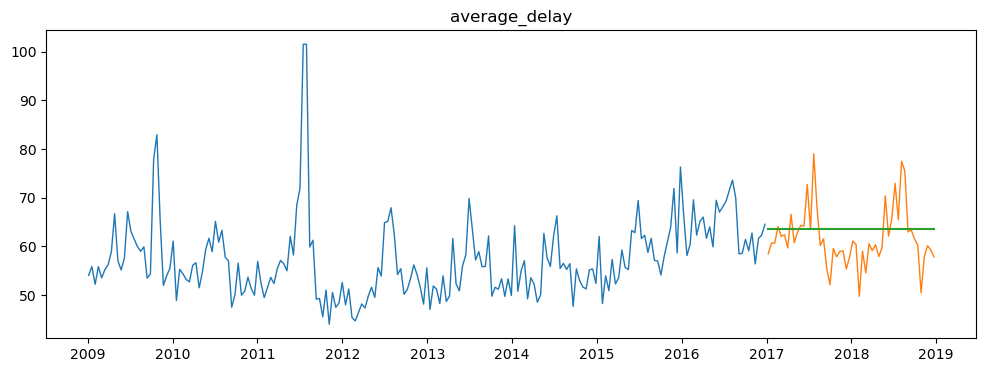

In [34]:
plot_and_eval('average_delay')

In [35]:
eval_df = append_eval_df(model_type = 'holts_linear_trend', 
                            target_var = 'average_delay')
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,6.52
0,average_of_all_test_means,average_delay,7.41
0,1_fortnight_moving_avg,average_delay,6.52
0,2_fortnight_moving_avg,average_delay,6.14
0,6_fortnight_moving_avg,average_delay,5.96
0,13_fortnight_moving_avg,average_delay,6.25
0,26_fortnight_moving_avg,average_delay,6.37
0,holts_linear_trend,average_delay,6.17


In [36]:
# Models for quantity
hst_average_delay_fit1 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='add').fit()
hst_average_delay_fit2 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='mul').fit()
hst_average_delay_fit3 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='add', damped=True).fit()
hst_average_delay_fit4 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='mul', damped=True).fit()


/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_40758/3474776484.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hst_average_delay_fit3 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='add', damped=True).fit()
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_40758/3474776484.py:5: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hst_average_delay_fit4 = ExponentialSmoothing(train.average_delay, seasonal_periods=26, trend='add', seasonal='mul', damped=True).fit()


In [37]:
results_average_delay=pd.DataFrame({'model':['hst_average_delay_fit1', 'hst_average_delay_fit2', 'hst_average_dalay_fit3', 'hst_average_delay_fit4'],
                              'SSE':[hst_average_delay_fit1.sse, hst_average_delay_fit2.sse, hst_average_delay_fit3.sse, hst_average_delay_fit4.sse]})
results_average_delay.sort_values(by='SSE')

,model,SSE
3,hst_average_delay_fit4,6422.176406
1,hst_average_delay_fit2,6432.131553
2,hst_average_dalay_fit3,6746.931352
0,hst_average_delay_fit1,6760.042014


In [38]:
yhat_df = pd.DataFrame({'average_delay': hst_average_delay_fit3.forecast(validate.shape[0] + 1)},
                          index=validate.index)
yhat_df.head()

,average_delay
FL_DATE,
2017-01-08,62.808112
2017-01-22,59.190277
2017-02-05,60.388971
2017-02-19,60.680860
2017-03-05,60.440692


average_delay -- RMSE: 5


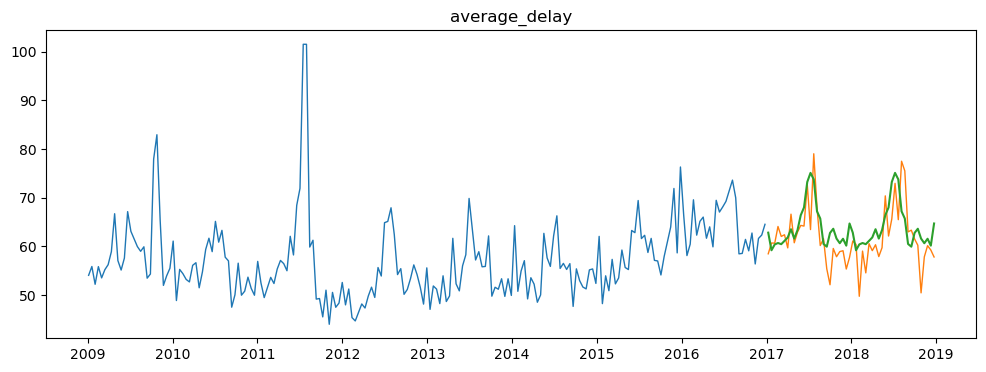

In [39]:
plot_and_eval('average_delay')

In [40]:
eval_df = append_eval_df(model_type = 'holts_seasonal', 
                            target_var = 'average_delay')

eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,6.52
0,average_of_all_test_means,average_delay,7.41
0,1_fortnight_moving_avg,average_delay,6.52
0,2_fortnight_moving_avg,average_delay,6.14
0,6_fortnight_moving_avg,average_delay,5.96
0,13_fortnight_moving_avg,average_delay,6.25
0,26_fortnight_moving_avg,average_delay,6.37
0,holts_linear_trend,average_delay,6.17
0,holts_seasonal,average_delay,5.01


In [41]:
# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015.
yhat_df = train.loc['2015':'2017'] + train.diff(53).mean()

# set yhat_df to index of validate
yhat_df.index = validate.index

In [42]:
yhat_df

,average_delay
FL_DATE,
2017-01-08,63.493105
2017-01-22,49.679619
2017-02-05,55.392437
2017-02-19,52.336112
2017-03-05,58.767943
2017-03-19,53.735624
2017-04-02,54.954420
2017-04-16,60.690295
2017-04-30,57.102614


average_delay -- RMSE: 7


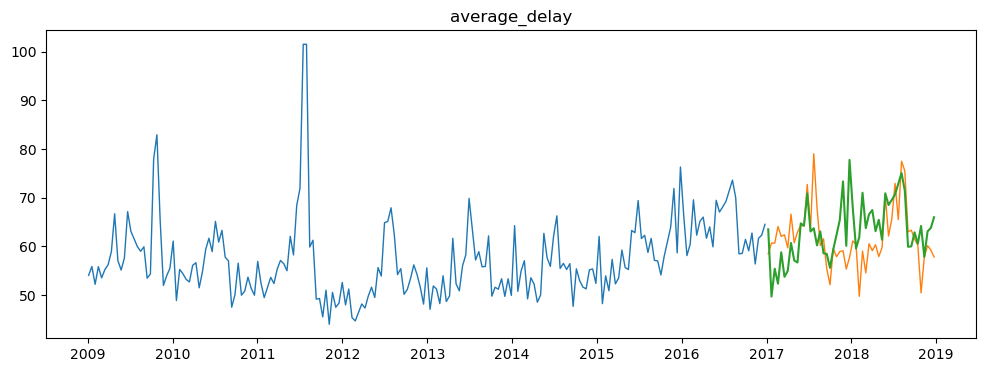

,model_type,target_var,rmse
0,last_observed_value,average_delay,6.52
0,average_of_all_test_means,average_delay,7.41
0,1_fortnight_moving_avg,average_delay,6.52
0,2_fortnight_moving_avg,average_delay,6.14
0,6_fortnight_moving_avg,average_delay,5.96
0,13_fortnight_moving_avg,average_delay,6.25
0,26_fortnight_moving_avg,average_delay,6.37
0,holts_linear_trend,average_delay,6.17
0,holts_seasonal,average_delay,5.01
0,previous 2 years,average_delay,7.04


In [43]:
plot_and_eval('average_delay')
eval_df = append_eval_df(model_type = 'previous 2 years', target_var = 'average_delay')

eval_df

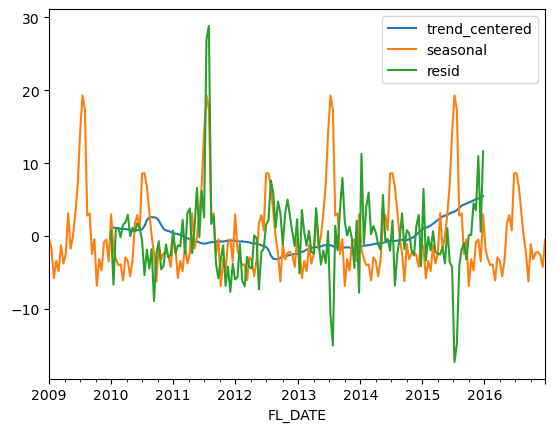

In [44]:
y = train.average_delay.resample('2w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

### Final Test

In [45]:
yhat_df = pd.DataFrame({'average_delay': hst_average_delay_fit3.forecast(validate.shape[0] + test.shape[0] + 1)})
yhat_df

,average_delay
2017-01-08,62.808112
2017-01-22,59.190277
2017-02-05,60.388971
2017-02-19,60.680860
2017-03-05,60.440692
...,...
2019-11-24,61.555115
2019-12-08,60.140878
2019-12-22,64.691466
2020-01-05,62.808113


In [46]:
yhat_df = yhat_df['2019':]

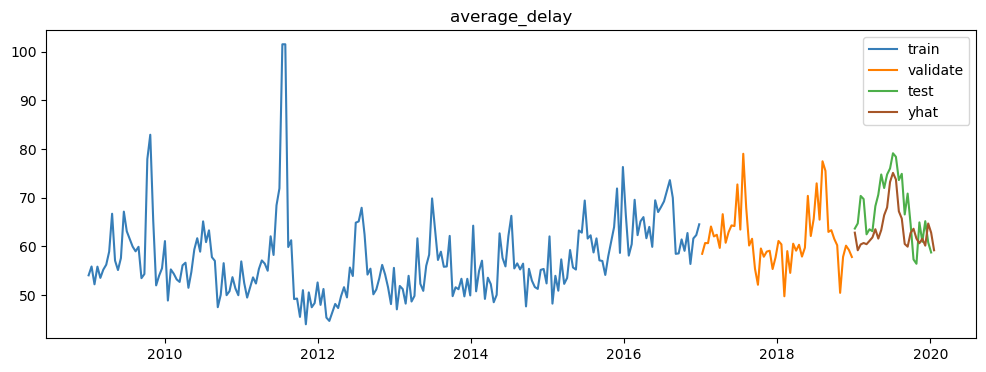

In [47]:
def final_plot(target_var, train, validate, test, yhat_df):
    yhat_df = yhat_df['2019':]
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='train')
    plt.plot(validate[target_var], color='#ff7f00', label='validate')
    plt.plot(test[target_var], color='#4daf4a',label='test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.legend()
    plt.title(target_var)
    plt.show()
    
final_plot('average_delay', train, validate, test, yhat_df)

In [48]:
def final_rmse(test, yhat_df):
    
    #The predictions does one extra going into 2020
    yhat_df = yhat_df[0:-1]
    
    #rmse calculater
    rmse_sales_total = sqrt(mean_squared_error(test['average_delay'], 
                                           yhat_df['average_delay']))

    print('FINAL PERFORMANCE OF MODEL ON TEST DATA')
    print('rmse-sales total: ', rmse_sales_total)


    final_plot('average_delay', train, validate, test, yhat_df)


FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-sales total:  6.1083739925507325


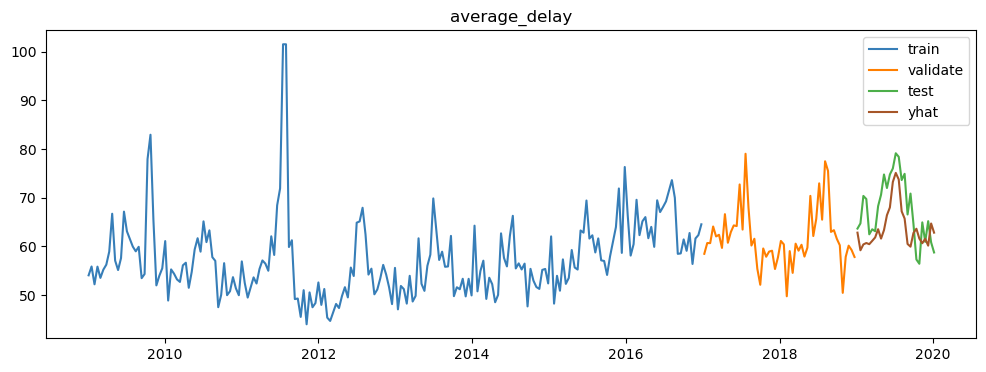

In [49]:
final_rmse(test, yhat_df)

In [284]:
forecast = pd.DataFrame({'average_delay': hst_average_delay_fit3.forecast(validate.shape[0] + test.shape[0] + 1 + 365)})
forecast = forecast['2018':]
forecast

,average_delay
2018-01-07,14.813403
2018-01-21,11.071572
2018-02-04,11.130772
2018-02-18,13.337051
2018-03-04,13.234041
...,...
2033-11-20,12.421697
2033-12-04,16.301095
2033-12-18,14.813397
2034-01-01,11.071566


In [285]:
len(yhat_df)

28

In [286]:
test

,average_delay
FL_DATE,
2019-01-06,14.182321
2019-01-20,12.655742
2019-02-03,17.150199
2019-02-17,15.690293
2019-03-03,18.794164
2019-03-17,15.060238
2019-03-31,11.252214
2019-04-14,14.758753
2019-04-28,14.559151


In [287]:
yhat_df = yhat_df[0:-2]

In [288]:
yhat_df

,average_delay
2019-01-06,14.813399
2019-01-20,11.071568
2019-02-03,11.130768
2019-02-17,13.337047
2019-03-03,13.234038
2019-03-17,12.324439
2019-03-31,12.233647
2019-04-14,13.262204
2019-04-28,11.513294
2019-05-12,13.686101


## Findings

### I have found that the delay columns are independent and that they can be combined into one colum for total delay for each observation.  I have also found that the best resample is the 2 week average for delays.  This provides the least noise in extracting the seasonal patterns year over year while maintaining enough correlation peaks over several years to run an analysis.  
